# **Concrete Strength Prediction With Machine Learning**

In [342]:
!pip install  kagglehub

##**Load Data**

In [343]:
import kagglehub

path = kagglehub.dataset_download(
    "prathamtripathi/regression-with-neural-networking"
)

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'regression-with-neural-networking' dataset.
Path to dataset files: /kaggle/input/regression-with-neural-networking


In [344]:
import pandas as pd
import os

df = pd.read_csv(os.path.join(path, "concrete_data.csv"))
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


##**Data Preparation**

### **Dataa Separation as X and Y**

In [345]:
#targets
y=df["Strength"]
y.head()

,Strength
0,79.99
1,61.89
2,40.27
3,41.05
4,44.30


In [346]:
#features
x=df.drop("Strength",axis=1)
x.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


### **Data splitting**

In [347]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=100)


In [348]:
x_train.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
279,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,3
939,145.9,230.5,0.0,202.5,3.4,827.0,871.8,28
923,162.0,207.0,172.0,216.0,10.0,822.0,638.0,28
737,238.0,0.0,0.0,186.0,0.0,1119.0,789.0,28
213,230.0,0.0,118.3,195.5,4.6,1029.4,758.6,100


## **Model building**

### **Linear regression**

**Training model**


In [349]:
from sklearn.linear_model import LinearRegression

#linear regression model
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

 **Applying model to make prediction**

In [350]:
y_lr_train_pred=lr.predict(x_train)
y_lr_test_pred=lr.predict(x_test)

In [351]:
print(y_lr_train_pred[:10])


[25.0767901  24.33344497 33.86797161 16.7091378  32.29417741 30.62878374
 36.68965423 49.10477118 37.94649195 71.10744328]


In [352]:
y_lr_test_pred[:10]


array([61.20606473, 53.50025719, 21.97331624, 27.71698753, 51.27187794,
       18.30660055, 30.452918  , 24.27479585, 29.00241422, 22.28290217])

 **Evaluate model performance**

In [353]:
from  sklearn.metrics import r2_score,root_mean_squared_error
lr_train_rmse=root_mean_squared_error(y_train,y_lr_train_pred)
lr_train_r2=r2_score(y_train,y_lr_train_pred)

lr_test_rmse=root_mean_squared_error(y_test,y_lr_test_pred)
lr_test_r2=r2_score(y_test,y_lr_test_pred)

In [354]:
print("Training RMSE:",lr_train_rmse)

Training RMSE: 10.240979570078867


In [355]:
print(f"Training R²   : {lr_train_r2:.4f}")

Training R²   : 0.6180


In [356]:
print(f"Test RMSE     : {lr_test_rmse:.4f}")

Test RMSE     : 11.3644


In [357]:
print(f"Test R²       : {lr_test_r2:.4f}")


Test R²       : 0.5914


In [358]:
lr_results=pd.DataFrame(['LinearRegression',lr_train_rmse,lr_train_r2,lr_test_rmse,lr_test_r2]).transpose()
lr_results.columns=["Method","Training RMSE","Training R2","Test RMSE","Test R2"]


In [359]:
display(lr_results)

,Method,Training RMSE,Training R2,Test RMSE,Test R2
0,LinearRegression,10.24098,0.617967,11.364353,0.591443


### **Random Forest**

**Training model**

In [405]:
from sklearn.ensemble import RandomForestRegressor

#Random Forest Regressor Model
rf = RandomForestRegressor(
    n_estimators=200,
    min_samples_leaf=2,
    min_samples_split=3,
    max_depth=10,
    random_state=100,
    )

rf.fit(x_train,y_train)


RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=3,
                      n_estimators=200, random_state=100)

**Apply model to make prediction**


In [406]:
y_rf_train_pred=rf.predict(x_train)
y_rf_test_pred=rf.predict(x_test)

**Evaluate model performance**

In [407]:
from  sklearn.metrics import r2_score,root_mean_squared_error
rf_train_rmse=root_mean_squared_error(y_train,y_rf_train_pred)
rf_train_r2=r2_score(y_train,y_rf_train_pred)

rf_test_rmse=root_mean_squared_error(y_test,y_rf_test_pred)
rf_test_r2=r2_score(y_test,y_rf_test_pred)

In [408]:
rf_results=pd.DataFrame(['RandomForestRegression',rf_train_rmse,rf_train_r2,rf_test_rmse,rf_test_r2]).transpose()
rf_results.columns=["Method","Training RMSE","Training R2","Test RMSE","Test R2"]

### **Model Comparsion**

In [409]:
df_models=pd.concat([lr_results,rf_results],axis=0)
display(df_models.reset_index(drop=True))

,Method,Training RMSE,Training R2,Test RMSE,Test R2
0,LinearRegression,10.24098,0.617967,11.364353,0.591443
1,RandomForestRegression,2.620586,0.974984,7.02145,0.844039


#**Data visualization of predicted results using Random Forest Regressor**

In [410]:
import matplotlib.pyplot as plt
import numpy as np

def plot_predictions(y_true, y_pred, title):
    plt.figure(figsize=(5, 5))

    plt.scatter(
        y_true, y_pred,
        alpha=0.3
    )

    # Perfect prediction line (y = x)
    min_val = min(y_true.min(), y_pred.min())
    max_val = max(y_true.max(), y_pred.max())
    plt.plot([min_val, max_val], [min_val, max_val], linestyle="--")

    plt.xlabel("Experimental Compressive Strength (MPa)")
    plt.ylabel("Predicted Compressive Strength (MPa)")
    plt.title(title)
    plt.tight_layout()
    plt.show()

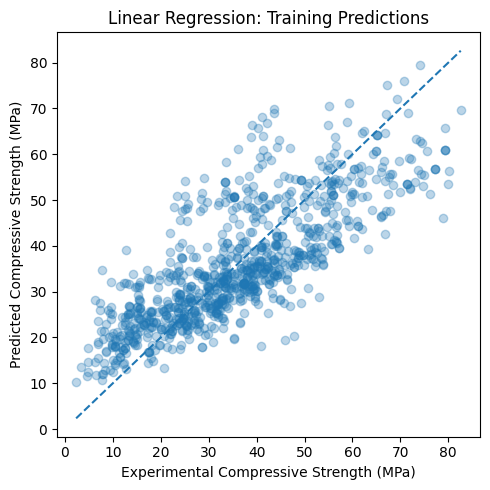

In [411]:
plot_predictions(
    y_train,
    y_lr_train_pred,
    title="Linear Regression: Training Predictions"
)


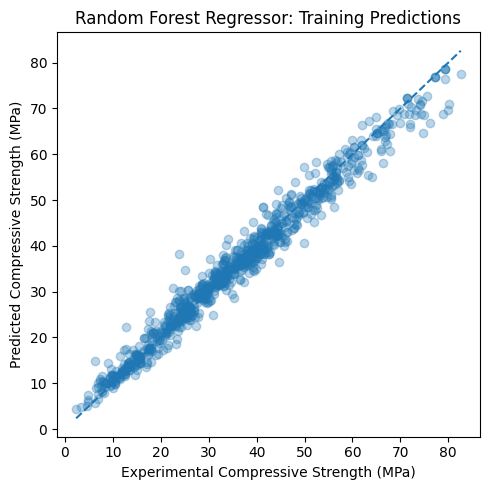

In [412]:
plot_predictions(
    y_train,
    y_rf_train_pred,
    title="Random Forest Regressor: Training Predictions"
)

**Best model is the Random Forest Regressor for this task.**

## **Saving the models**

In [413]:
import pickle

# Save Linear Regression
with open("linear_regression_model.pkl", "wb") as f:
    pickle.dump(lr, f)

# Save Random Forest
with open("random_forest_model.pkl", "wb") as f:
    pickle.dump(rf, f)

print("Models saved successfully!")

Models saved successfully!
